<ipython-input-1-67a3691f07c8>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[features] = df[features].fillna(method='ffill').fillna(method='bfill')


Silhouette Score: 0.54


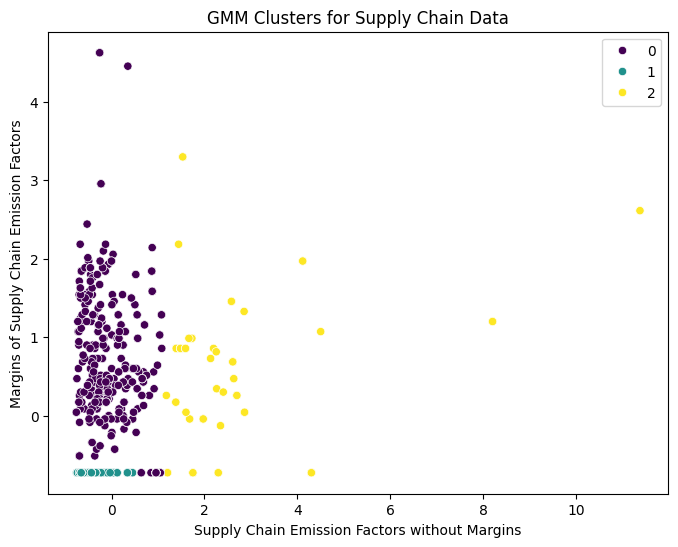

Clustered data saved to path_to_save_clustered_data.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Step 1: Load Data from File
file_path = "/content/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022 (1).csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Step 2: Preprocess Data
# Select relevant numeric features
features = ['Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors']

# Ensure the features exist in the dataset
if not set(features).issubset(df.columns):
    raise ValueError("One or more specified features are not in the dataset columns.")

# Handle missing values (if any)
df[features] = df[features].fillna(method='ffill').fillna(method='bfill')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Step 3: Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

# Predict cluster labels
clusters = gmm.predict(X_scaled)

# Add clusters to the original DataFrame
df['Cluster'] = clusters

# Step 4: Evaluate Clustering
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Step 5: Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis')
plt.title("GMM Clusters for Supply Chain Data")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.show()

# Optional: Save the DataFrame with clusters
output_file_path = "path_to_save_clustered_data.csv"  # Replace with your desired output path
df.to_csv(output_file_path, index=False)
print(f"Clustered data saved to {output_file_path}")


<ipython-input-2-da36ad5ba50c>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[features] = df[features].fillna(method='ffill').fillna(method='bfill')


Silhouette Score: 0.54


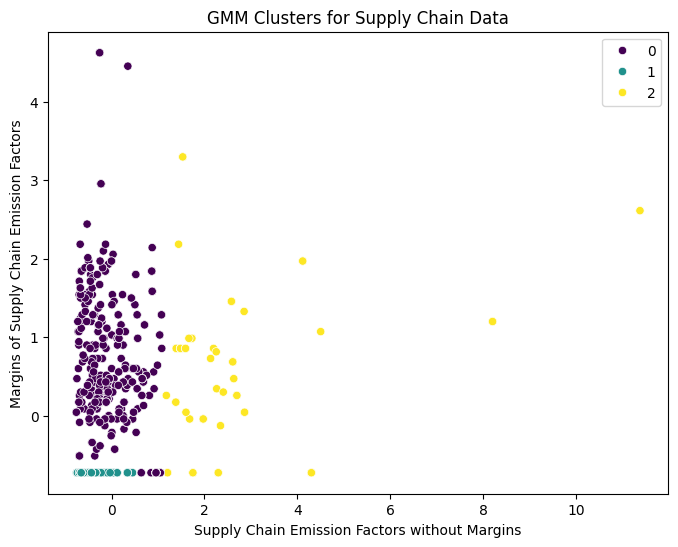

Clustered data saved to path_to_save_clustered_data.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

def load_data(file_path, features):
    """Load and validate the dataset."""
    df = pd.read_csv(file_path)
    if not set(features).issubset(df.columns):
        raise ValueError("One or more specified features are not in the dataset columns.")
    return df

def preprocess_data(df, features):
    """Handle missing values and standardize features."""
    df[features] = df[features].fillna(method='ffill').fillna(method='bfill')
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])
    return X_scaled

def apply_gmm(X_scaled, n_components=3, random_state=42):
    """Apply Gaussian Mixture Model to the data."""
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=random_state)
    gmm.fit(X_scaled)
    clusters = gmm.predict(X_scaled)
    return gmm, clusters

def evaluate_clustering(X_scaled, clusters):
    """Evaluate clustering using Silhouette Score."""
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f"Silhouette Score: {silhouette_avg:.2f}")
    return silhouette_avg

def visualize_clusters(X_scaled, clusters, features):
    """Visualize the clusters using a scatter plot."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis')
    plt.title("GMM Clusters for Supply Chain Data")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

def save_results(df, clusters, output_file_path):
    """Add cluster labels to the DataFrame and save to a file."""
    df['Cluster'] = clusters
    df.to_csv(output_file_path, index=False)
    print(f"Clustered data saved to {output_file_path}")

# Main Script
if __name__ == "__main__":
    # Configuration
    file_path = "/content/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022 (1).csv"  # Replace with your file path
    output_file_path = "path_to_save_clustered_data.csv"  # Replace with your desired output path
    features = ['Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors']

    # Step 1: Load Data
    df = load_data(file_path, features)

    # Step 2: Preprocess Data
    X_scaled = preprocess_data(df, features)

    # Step 3: Apply Gaussian Mixture Model
    gmm, clusters = apply_gmm(X_scaled)

    # Step 4: Evaluate Clustering
    evaluate_clustering(X_scaled, clusters)

    # Step 5: Visualize Clusters
    visualize_clusters(X_scaled, clusters, features)

    # Step 6: Save Results
    save_results(df, clusters, output_file_path)
